In [4]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df

In [5]:
import json
import os

def get_predictor_data(studies):
    train_data=[]
    for study_folder in studies: 
        data=[]
        #study_folder=f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/classifier_train/{study_name}"
        subjects= os.listdir(study_folder)

        subjects=[subject for subject in subjects if os.path.isdir(f"{study_folder}/{subject}")]
        print(subjects)
        for name in subjects:
            try:
                test_acc=results_to_df(f"{study_folder}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_acc":"acc","test_loss":"test_acc"})
                #test_acc=test_acc.rename(columns={"test_loss":"test_acc"})
                #print(test_acc.columns)
                #if len(test_acc)>49:
                test_acc_piv = test_acc[["epoch","test_acc","name"]].pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                #test_acc_piv["best_acc"]=test_acc["acc"].max()
                data.append(test_acc_piv)
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data


In [685]:
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [686]:
import pandas as pd
from itertools import combinations
dataset="Mateo"
if dataset=="Gutenberg":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Gutenberg"]).sort_values("name").set_index("name")
elif dataset=="Mateo":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Mateo"]).sort_values("name").set_index("name")
elif dataset=="Chester":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Chester"]).sort_values("name").set_index("name")
elif dataset=="Adaline":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Adaline"]).sort_values("name").set_index("name")
elif dataset=="LaMelo":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/LaMelo"]).sort_values("name").set_index("name")
elif dataset=="Caitie":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Caitie"]).sort_values("name").set_index("name")
elif dataset=="Sadie":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Sadie"]).sort_values("name").set_index("name")



['adaptable_mouflon', 'amiable_kangaroo', 'amiable_owl', 'amphibian_narwhal', 'ancient_swine', 'antique_wolf', 'aquatic_dragon', 'arcane_turaco', 'asparagus_chinchilla', 'aspiring_uakari', 'astute_ibex', 'awesome_dodo', 'belligerent_deer', 'beryl_polecat', 'bipedal_ibis', 'blond_elephant', 'blue_stingray', 'brainy_turtle', 'brass_mackerel', 'burrowing_rattlesnake', 'calculating_sawfish', 'carmine_jackdaw', 'cerulean_nautilus', 'cheerful_falcon', 'clever_ibis', 'clever_pheasant', 'crouching_python', 'dancing_trout', 'dandelion_peccary', 'demonic_bonobo', 'elegant_pigeon', 'elite_ringtail', 'enigmatic_agouti', 'enormous_ocelot', 'enthusiastic_guppy', 'enthusiastic_narwhal', 'evasive_coati', 'exuberant_platypus', 'fancy_giraffe', 'feathered_jerboa', 'fervent_ostrich', 'fluorescent_python', 'fractal_goose', 'fragrant_bug', 'gainful_snake', 'giga_terrier', 'gigantic_myna', 'granite_earwig', 'gray_dog', 'great_cormorant', 'great_whippet', 'gregarious_oarfish', 'grumpy_pronghorn', 'handsome_t

In [687]:
train_data

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50
name,,,,,,,,,,,,,,,,,,,,,
adaptable_mouflon,10.00,27.01,34.86,36.90,42.23,67.71,82.71,82.14,85.55,84.42,...,96.96,97.03,96.96,97.05,97.04,97.13,97.04,97.07,97.09,97.09
amiable_kangaroo,10.00,27.22,32.37,37.18,55.55,71.93,76.80,76.73,86.66,86.08,...,96.79,96.88,96.93,96.92,96.93,97.06,97.01,97.02,97.11,97.07
amiable_owl,9.52,32.11,34.64,37.19,57.13,73.25,77.68,84.89,87.62,88.80,...,96.55,96.96,96.80,96.73,96.88,96.92,96.77,96.89,96.98,96.89
amphibian_narwhal,10.01,25.34,32.04,32.69,42.44,54.23,59.82,74.68,78.21,80.41,...,95.86,96.06,96.23,96.18,96.20,96.20,96.30,96.34,96.26,96.26
ancient_swine,10.78,29.95,34.20,29.36,37.51,52.59,60.50,74.97,79.14,85.43,...,97.13,97.24,97.23,97.30,97.31,97.34,97.30,97.37,97.37,97.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
warping_magpie,10.09,24.64,28.53,31.18,36.73,44.95,43.62,69.61,79.95,78.04,...,95.82,96.04,96.07,96.20,96.12,96.21,96.19,96.27,96.29,96.26
weightless_polecat,10.00,25.17,28.97,32.91,33.08,43.69,58.09,66.68,78.23,77.47,...,95.18,95.48,95.46,95.58,95.68,95.75,95.60,95.68,95.66,95.68
whispering_hamster,10.11,22.89,30.29,29.80,33.56,35.72,42.64,55.80,69.58,73.22,...,94.43,94.55,94.54,94.68,94.81,94.86,94.75,94.86,94.84,94.92


In [688]:
#train_data=train_data.head(len(train_data_dist))

In [689]:
# Inheritance
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_17_50/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_21_40/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_18_37/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_19_01/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_20_08/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_21_19/Sadie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_22_45/Caitie"]).sort_values("name").set_index("name")

#Updated weights:
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_10_13/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_10_43/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_10_58/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_11_08/Gutenberg"]).sort_values("name").set_index("name")


#Inheritance + stem
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_18_08/Adaline"]).sort_values("name").set_index("name")


# Inheritance + distillation
#kd
test_name="kd9_inheritance"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/26_08_2024_18_38/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_10_22/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_10_55/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_11_09/Gutenberg"]).sort_values("name").set_index("name")
train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_13_04/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_15_10/Sadie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_15_29/Caitie"]).sort_values("name").set_index("name")



#dkd
#test_name="dkd2_inheritance"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/26_08_2024_18_17/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_10_28/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_11_07/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_13_04/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_13_18/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_13_33/Sadie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_15_20/Caitie"]).sort_values("name").set_index("name")






#Adaline no aug
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_22_24/Adaline"]).sort_values("name").set_index("name")

#train_data_dist=train_data_dist.iloc[:-1,:]


if len(train_data_dist)<len(train_data):
    train_data=train_data.loc[train_data_dist.index]
else:
    train_data_dist=train_data_dist.loc[train_data.index]

    #train_data=train_data.head(len(train_data_dist))
#train_data_dist=train_data_dist.head(len(train_data))

['adaptable_mouflon', 'amiable_kangaroo', 'amiable_owl', 'amphibian_narwhal', 'ancient_swine', 'antique_wolf', 'aquatic_dragon', 'arcane_turaco', 'asparagus_chinchilla', 'aspiring_uakari', 'astute_ibex', 'awesome_dodo', 'belligerent_deer', 'beryl_polecat', 'bipedal_ibis', 'blond_elephant', 'blue_stingray', 'brainy_turtle', 'brass_mackerel', 'burrowing_rattlesnake', 'calculating_sawfish', 'carmine_jackdaw', 'cerulean_nautilus', 'cheerful_falcon', 'clever_ibis', 'clever_pheasant', 'crouching_python', 'dancing_trout', 'dandelion_peccary', 'demonic_bonobo', 'elegant_pigeon', 'elite_ringtail', 'enigmatic_agouti', 'enormous_ocelot', 'enthusiastic_guppy', 'enthusiastic_narwhal', 'evasive_coati', 'exuberant_platypus', 'fancy_giraffe', 'feathered_jerboa', 'fervent_ostrich', 'fluorescent_python', 'fractal_goose', 'fragrant_bug', 'gainful_snake', 'giga_terrier', 'gigantic_myna', 'granite_earwig', 'gray_dog', 'great_cormorant', 'great_whippet', 'gregarious_oarfish', 'grumpy_pronghorn', 'handsome_t

In [690]:
#train_data=train_data.loc[train_data_dist.index]

In [691]:
len(train_data_dist)

101

In [640]:
#vanilla hs
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla_hs/27_08_2024_00_19/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla_hs/27_08_2024_00_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla_hs/27_08_2024_01_18/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla_hs/27_08_2024_02_54/LaMelo"]).sort_values("name").set_index("name")




#KD
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_00_44/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_20_27/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/17_08_2024_14_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_01_01/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_07/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_21/Caitie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/19_08_2024_07_46/Sadie"]).sort_values("name").set_index("name")

#DKD
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_08_48/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_15_30/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_16_06/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_20_38/Adaline"]).sort_values("name").set_index("name")

#DKD8
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_08_57/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_09_17/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_09_19/Adaline"]).sort_values("name").set_index("name")

#DKD2 high smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_34/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_39/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_41/Adaline"]).sort_values("name").set_index("name")

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_21_51/Sadie"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_21_55/Sadie"]).sort_values("name").set_index("name")
#train_data_dist_3=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_21_58/Sadie"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist+train_data_dist_3)/3

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_22_11/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_22_14/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist_3=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_22_20/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist+train_data_dist_3)/3

train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/23_08_2024_11_00/Mateo"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/23_08_2024_11_09/Mateo"]).sort_values("name").set_index("name")
#train_data_dist_3=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/23_08_2024_11_27/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist+train_data_dist_3)/3



#DKD2 smoothing best teacher
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/22_08_2024_15_23/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/22_08_2024_15_24/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist)/2

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/27_08_2024_00_47/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/27_08_2024_00_53/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/27_08_2024_01_15/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/27_08_2024_03_14/LaMelo"]).sort_values("name").set_index("name")






#kd 5 epochs
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_5epochs/22_08_2024_00_15/Gutenberg"]).sort_values("name").set_index("name")

#KD_10_annealing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_annealing/21_08_2024_17_29/Gutenberg"]).sort_values("name").set_index("name")

#KD_smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_smoothing/21_08_2024_20_13/Gutenberg"]).sort_values("name").set_index("name")

#KD18
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_08_56/Gutenberg"]).sort_values("name").set_index("name")
#strain_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_09_17/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_09_19/Adaline"]).sort_values("name").set_index("name")

#KD18 best teacher
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18_best_teacher/22_08_2024_09_43/Adaline"]).sort_values("name").set_index("name")

#KD no augmentation high smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_13_00/Adaline"]).sort_values("name").set_index("name")

#KD9 high smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_36/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_39/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_41/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_13_02/Adaline"]).sort_values("name").set_index("name")

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/23_08_2024_10_26/Caitie"]).sort_values("name").set_index("name")


#/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/23_08_2024_10_33/Mateo
#/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/23_08_2024_10_36/Mateo


#KD9 high smoothing best teacher
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/22_08_2024_15_21/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/22_08_2024_15_25/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist)/2

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/27_08_2024_00_34/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/27_08_2024_00_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/27_08_2024_01_07/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/27_08_2024_03_03/LaMelo"]).sort_values("name").set_index("name")


#train_data_dist=train_data_dist.iloc[:,:11]
#train_data_dist=train_data_dist.iloc[:-1,:]

#train_data_dist=train_data_dist.head(len(train_data_dist)-1)
train_data=train_data.head(len(train_data_dist))
train_data_dist=train_data_dist.head(len(train_data))

['adaptable_mouflon', 'amiable_kangaroo', 'amiable_owl', 'amphibian_narwhal', 'ancient_swine', 'antique_wolf', 'aquatic_dragon', 'arcane_turaco', 'asparagus_chinchilla', 'aspiring_uakari', 'astute_ibex', 'awesome_dodo', 'belligerent_deer', 'beryl_polecat', 'bipedal_ibis', 'blond_elephant', 'blue_stingray', 'brainy_turtle', 'brass_mackerel', 'burrowing_rattlesnake', 'calculating_sawfish', 'carmine_jackdaw', 'cerulean_nautilus', 'cheerful_falcon', 'clever_ibis', 'clever_pheasant', 'crouching_python', 'dancing_trout', 'dandelion_peccary', 'demonic_bonobo', 'elegant_pigeon', 'elite_ringtail', 'enigmatic_agouti', 'enormous_ocelot', 'enthusiastic_guppy', 'enthusiastic_narwhal', 'evasive_coati', 'exuberant_platypus', 'fancy_giraffe', 'feathered_jerboa', 'fervent_ostrich', 'fluorescent_python', 'fractal_goose', 'fragrant_bug', 'gainful_snake', 'giga_terrier', 'gigantic_myna', 'granite_earwig', 'gray_dog', 'great_cormorant']


In [164]:
#for i in range(11):
#        train_data_dist[f"epoch_{i}"]=train_data_dist[f"epoch_{i}"]-train_data_dist[f"epoch_{0}"]


In [692]:
train_data_dist.T.isnull().sum().sum()

0

In [693]:
#train_data
#train_data_cum= train_data.iloc[:,:-1].cummin(axis=1)
#train_data_cum["best_acc"]=train_data["best_acc"]

In [694]:
train_data_cum= train_data.cummax(axis=1)
train_data_cum["best_acc"]=train_data_cum.max(axis=1)
train_data["best_acc"]=train_data.max(axis=1)

train_data_dist_cum= train_data_dist.cummax(axis=1)
train_data_dist_cum["best_acc"]=train_data_dist_cum.max(axis=1)
train_data_dist["best_acc"]=train_data_dist.max(axis=1)

In [695]:
len(train_data_dist)

101

In [696]:
#train_data_cum= train_data.cummin(axis=1)
#train_data_cum["best_acc"]=train_data_cum.min(axis=1)
#train_data["best_acc"]=train_data.min(axis=1)

#train_data_dist_cum= train_data_dist.cummin(axis=1)
#train_data_dist_cum["best_acc"]=train_data_dist_cum.min(axis=1)
#train_data_dist["best_acc"]=train_data_dist.min(axis=1)

In [697]:
mean_df=pd.DataFrame([train_data_cum.mean().reset_index(drop=True),train_data_dist_cum.mean().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})

In [698]:
min_q=0.1
#df_min=pd.DataFrame([train_data_cum.min().reset_index(drop=True),train_data_dist_cum.min().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_min=pd.DataFrame([train_data_cum.quantile(min_q).reset_index(drop=True),train_data_dist_cum.quantile(min_q).reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_min.columns=["vanilla","inheritance"]

In [699]:
max_q=0.9
#df_max=pd.DataFrame([train_data_cum.max().reset_index(drop=True),train_data_dist_cum.max().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_max=pd.DataFrame([train_data_cum.quantile(max_q).reset_index(drop=True),train_data_dist_cum.quantile(max_q).reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_max.columns=["vanilla","inheritance"]

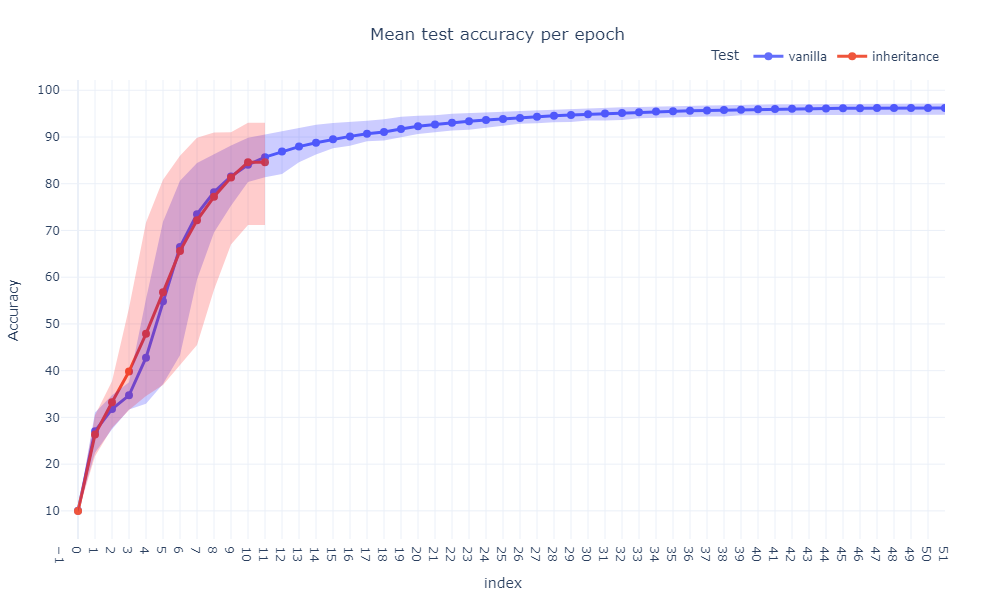

In [700]:
import plotly.express as px
import pandas as pd

# Assuming 'mean_df', 'df_min', and 'df_max' are your dataframes
fig = px.line(
    mean_df, 
    y=['vanilla', 'inheritance'], 
    title='Mean test accuracy per epoch',
    labels={"Value": "Accuracy"},
    markers=True,  # Add markers to the lines
    template="plotly_white", 
    width=1000, height=600
)

# Update trace settings for the main plot
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Adding min-max range shadows for 'vanilla'
#fig.add_traces([
#    px.line(mean_df, y='vanilla').data[0],  # Add the vanilla mean line
#    px.line(mean_df, y='inheritance').data[0]  # Add the inheritance mean line
#])

fig.add_traces([
    # Min-max shadows for 'vanilla'
    dict(
        x=mean_df.index, 
        y=df_min['vanilla'], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max['vanilla'], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(0, 0, 255, 0.2)',  # Light red for shadow
        showlegend=False
    ),
    
    # Min-max shadows for 'inheritance'
    dict(
        x=mean_df.index, 
        y=df_min['inheritance'], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max['inheritance'], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(255, 0, 0, 0.2)',  # Light blue for shadow
        showlegend=False
    )
])

# Update layout settings
fig.update_layout(
    title={'text': 'Mean test accuracy per epoch', 'x':0.5, 'xanchor': 'center'},
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    yaxis=dict(title="Accuracy"),
    legend=dict(title='Test', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()


In [701]:
test_name

'kd9_inheritance'

In [702]:
test_path=f"thesis_plots/{dataset}/{test_name}"
os.makedirs(test_path,exist_ok=True)
fig.write_image(f"{test_path}/mean_accuracy.png",format="svg")
fig.write_image(f"{test_path}/mean_accuracy.svg", format="svg")


In [703]:
train_data.sort_values("best_acc",ascending=False)

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50,best_acc
name,,,,,,,,,,,,,,,,,,,,,
awesome_dodo,10.00,29.72,31.09,34.99,47.73,61.62,71.55,82.48,77.32,85.58,...,97.21,97.12,97.35,97.38,97.38,97.32,97.38,97.39,97.44,97.44
ancient_swine,10.78,29.95,34.20,29.36,37.51,52.59,60.50,74.97,79.14,85.43,...,97.24,97.23,97.30,97.31,97.34,97.30,97.37,97.37,97.32,97.37
brainy_turtle,10.01,30.83,34.25,38.84,63.27,68.31,85.47,86.46,88.04,86.20,...,97.14,97.35,97.17,97.10,97.25,97.13,97.24,97.22,97.12,97.35
imported_coati,10.00,25.36,30.47,35.98,45.04,57.17,64.60,78.65,72.20,87.28,...,96.84,96.95,97.08,97.15,97.25,97.21,97.30,97.21,97.22,97.30
dandelion_peccary,10.00,28.31,33.52,36.36,57.99,73.34,80.90,79.89,85.80,88.27,...,96.90,97.03,96.99,97.21,97.01,97.24,97.30,97.25,97.12,97.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nostalgic_beaver,10.00,20.63,26.15,27.77,29.66,31.89,36.63,38.29,41.90,41.14,...,93.33,93.36,93.70,93.65,93.43,93.62,93.72,93.52,93.83,93.83
mighty_hornet,8.51,22.10,27.08,31.71,32.19,33.99,39.73,42.76,45.74,55.32,...,92.59,92.38,93.11,92.83,92.86,92.99,93.15,93.09,93.14,93.15
little_collie,9.98,26.30,31.30,34.35,35.35,46.95,59.27,64.44,72.64,74.85,...,92.63,92.63,92.74,92.75,92.85,92.82,92.84,92.69,92.80,92.85


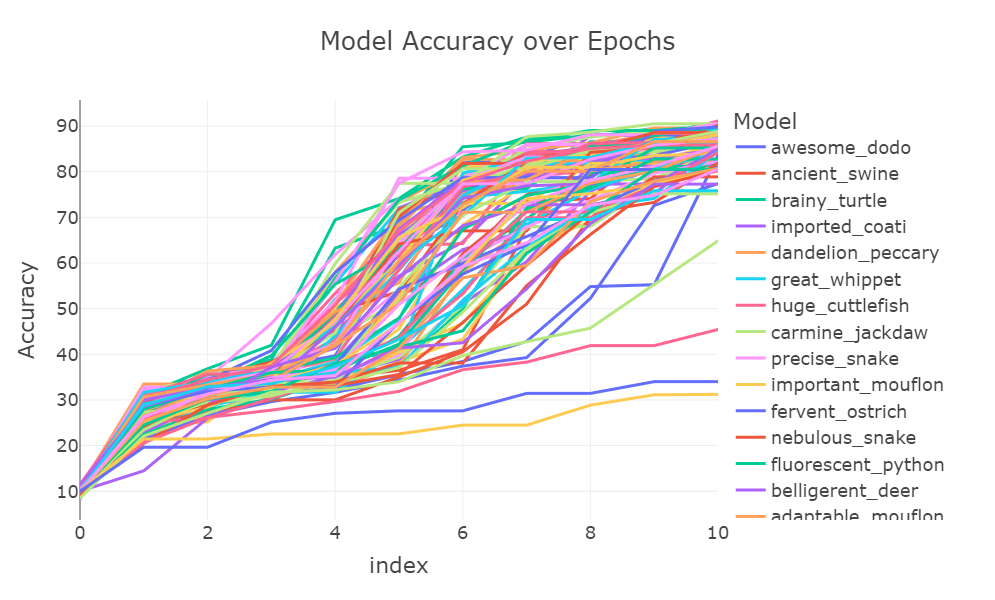

In [704]:
epochs_data=train_data_cum.sort_values("best_acc",ascending= False).iloc[:,:11].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

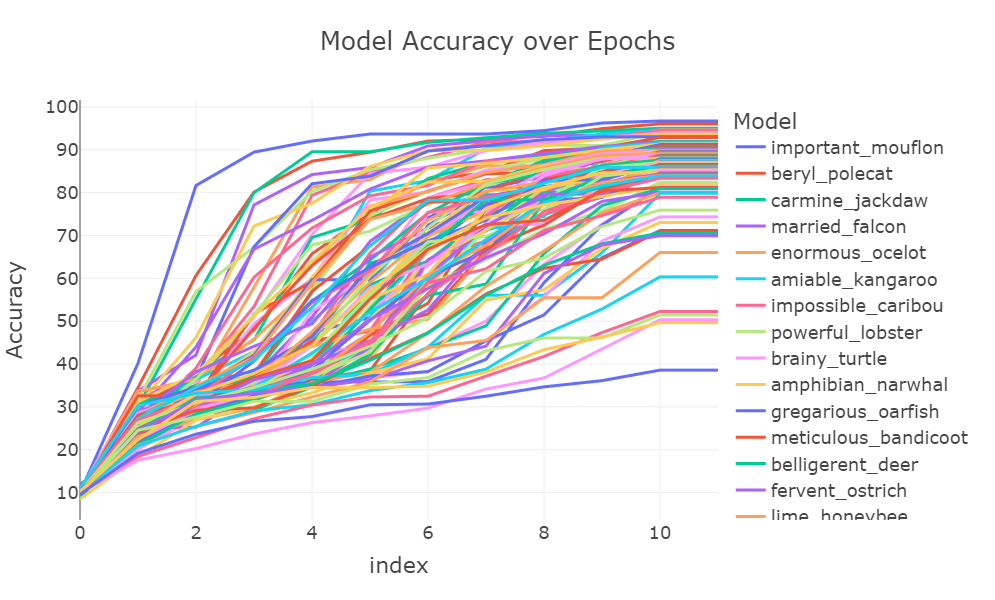

In [705]:
epochs_data=train_data_dist_cum.sort_values("best_acc",ascending= False).iloc[:,:50].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

In [706]:
train_data_cum=train_data_cum.reset_index()
train_data=train_data.reset_index()

train_data_dist_cum=train_data_dist_cum.reset_index()
train_data_dist=train_data_dist.reset_index()


In [707]:
n_epochs=10

In [708]:
correlation_matrix_base = train_data_cum.set_index("name").corr()
# Select the correlations with the last column
correlation_with_last_base = correlation_matrix_base.iloc[:-1, -1]

df_comp=pd.merge(train_data_dist_cum.iloc[:,:-1], train_data_cum[["name","best_acc"]], on="name")
correlation_matrix = df_comp.set_index("name").corr()
# Select the correlations with the last column
correlation_with_last = correlation_matrix.iloc[:-1, -1]

corr_df=pd.concat([pd.DataFrame(correlation_with_last_base).rename(columns={"best_acc":"base"}), pd.DataFrame(correlation_with_last).rename(columns={"best_acc":"dist"})], axis=1)


In [709]:
train_data_dist_cum

epoch,name,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,epoch_10,best_acc
0,adaptable_mouflon,10.00,22.20,29.56,33.99,37.63,44.96,56.32,65.64,75.57,80.17,83.36,83.36
1,amiable_kangaroo,10.00,30.32,34.79,37.28,56.62,80.34,82.83,90.23,91.99,93.72,94.47,94.47
2,amiable_owl,10.00,28.04,33.61,34.00,37.82,58.47,64.07,74.52,80.07,80.07,88.52,88.52
3,amphibian_narwhal,10.00,30.44,46.15,72.21,77.51,86.12,89.84,89.84,90.94,92.50,93.68,93.68
4,ancient_swine,10.00,25.70,31.43,37.50,54.70,64.28,75.22,82.14,84.43,84.43,89.42,89.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,rapid_ibex,10.00,26.22,32.72,32.72,35.22,43.91,64.32,72.17,79.67,79.67,86.06,86.06
97,real_trout,10.02,27.42,32.42,35.69,44.21,60.56,71.81,82.04,85.41,88.05,88.05,88.05
98,refreshing_cuttlefish,9.94,26.28,31.60,34.11,39.36,56.37,67.43,71.72,82.18,86.30,87.63,87.63
99,scrupulous_cassowary,10.31,28.32,32.48,49.39,60.00,78.26,80.21,85.20,86.28,88.69,91.37,91.37


In [710]:
total_data=[]


pairs = list(combinations(train_data_cum.index, 2))
combined_data = []

for idx1, idx2 in pairs:
    row1 = train_data_cum.loc[idx1]
    row2 = train_data_cum.loc[idx2]
    #row1 = train_data.loc[idx1]
    #row2 = train_data.loc[idx2]
    

    combined_row = {
        'name_A': row1['name'],
        'name_B': row2['name'],
        'best_acc_A': row1['best_acc'],
        'best_acc_B': row2['best_acc'],
        #'label': 1 if row1['best_acc'] > row2['best_acc'] else 0
        'label': row1['best_acc'] - row2['best_acc'] 

        
    }
    # Create the epochs_row dictionary
    epochs_rows = {
        f'epoch_{epoch}_A': row1[f'epoch_{epoch}'] for epoch in range(0, 51)
    }
    epochs_rows.update({
        f'epoch_{epoch}_B': row2[f'epoch_{epoch}'] for epoch in range(0, 51)
    })
    ##############################################################
    row1_dist=train_data_dist_cum.loc[idx1]
    row2_dist=train_data_dist_cum.loc[idx2]
    #row1_dist=train_data_dist.loc[idx1]
    #row2_dist=train_data_dist.loc[idx2]
    dist_rows= {
        f'dist_{epoch}_A': row1_dist[f'epoch_{epoch}'] for epoch in range(0, n_epochs+1)
    }
    dist_rows.update({
        f'dist_{epoch}_B': row2_dist[f'epoch_{epoch}'] for epoch in range(0, n_epochs+1)
    })
    combined_row.update(dist_rows)
    #######################
    
    # Update combined_row with epochs_rows
    combined_row.update(epochs_rows)

    combined_data.append(combined_row)

combined_df = pd.DataFrame(combined_data)



In [711]:
X_test_new=combined_df.drop(columns=['label'])
y_test_new=combined_df["label"]

In [712]:
epoch=5
X_test_new[["name_A","name_B","best_acc_A","best_acc_B",f"dist_{epoch}_A",f"dist_{epoch}_B",f"epoch_{epoch}_A",f"epoch_{epoch}_B"]]

,name_A,name_B,best_acc_A,best_acc_B,dist_5_A,dist_5_B,epoch_5_A,epoch_5_B
0,adaptable_mouflon,amiable_kangaroo,97.13,97.11,44.96,80.34,67.71,71.93
1,adaptable_mouflon,amiable_owl,97.13,96.98,44.96,58.47,67.71,73.25
2,adaptable_mouflon,amphibian_narwhal,97.13,96.34,44.96,86.12,67.71,54.23
3,adaptable_mouflon,ancient_swine,97.13,97.37,44.96,64.28,67.71,52.59
4,adaptable_mouflon,antique_wolf,97.13,96.96,44.96,50.79,67.71,61.76
...,...,...,...,...,...,...,...,...
5045,real_trout,scrupulous_cassowary,96.89,96.64,60.56,78.26,70.73,52.72
5046,real_trout,singing_ant,96.89,95.96,60.56,61.81,70.73,37.24
5047,refreshing_cuttlefish,scrupulous_cassowary,96.67,96.64,56.37,78.26,65.28,52.72
5048,refreshing_cuttlefish,singing_ant,96.67,95.96,56.37,61.81,65.28,37.24


In [713]:
#epoch=10

#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#y_0=np.repeat(0,len(y_test_new))
#y_0= (X_test_new[f'epoch_{epoch}_A'] > X_test_new[f'epoch_{epoch}_B']).astype(int).values
## Calculate accuracy
#y_0_accuracy = accuracy_score(y_test_new, y_0)
#print(f"Accuracy: {y_0_accuracy}")

In [714]:
#y_0=np.repeat(0,len(y_test_new))
#y_0= (X_test_new[f'dist_{epoch}_A'] > X_test_new[f'dist_{epoch}_B']).astype(int).values
# Calculate accuracy
#y_0_accuracy = accuracy_score(y_test_new, y_0)
#print(f"Accuracy: {y_0_accuracy}")

In [715]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

def kendall_tau_distance(list1, list2):
    tau, _ = kendalltau(list1, list2)
    return tau
def spearman_rank_correlation(list1, list2):
    corr, _ = spearmanr(list1, list2)
    return corr
def get_correlations_epochs(combined_df):  
    #accs={}
    #accs_slope={}
    corrs={}
    corrs_slope={}
    
    rankings_slope={}
    rankings_vanilla={}
    results={}
    X_test_new=combined_df
    y_test_new=combined_df["label"]
    for epoch in range(0,51):
        #############################
        #if epoch<=n_epochs:
        #    y_pred_slope= (X_test_new[f'dist_{epoch}_A'] >= X_test_new[f'dist_{epoch}_B']).astype(int).values        
        #else:
        #    y_pred_slope= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values
        if epoch<=n_epochs:
            y_pred_slope= (X_test_new[f'dist_{epoch}_A'] - X_test_new[f'dist_{epoch}_B']).values        
        else:
            y_pred_slope= (X_test_new[f'epoch_{epoch}_A'] - X_test_new[f'epoch_{epoch}_B']).values
        #print(y_pred_slope)
        #accuracy_slope = accuracy_score(y_test_new, y_pred_slope)
        #accs_slope[epoch]=accuracy_slope
        ############################
        #y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values
        y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] - X_test_new[f'epoch_{epoch}_B']).values

        
        #accuracy = accuracy_score(y_test_new, y_epoch_10_pred)
        #accs[epoch]=accuracy
        
        ranking_test_df=X_test_new[["name_A","name_B", "label"]]
        ranking_test_df["pred_10_epochs"]=y_epoch_10_pred
        #####################
        ranking_test_df["pred_slope"]=y_pred_slope
        ################################
        # Create a new column by applying the function to each row
        ranking_target={}
        ranking_10={}
        ranking_slope={}
        
        for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
            ranking_target[ind]=0
            ranking_10[ind]=0
            ranking_slope[ind]=0
            
        for index, row in ranking_test_df.iterrows():
            #if row["label"]==1:
            #    ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
            #else:
            #    ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

            #if row["pred_10_epochs"]==1:
            #    ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
            #else:
            #    ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

            #if row["pred_slope"]==1:
            #    ranking_slope[row["name_A"]]=ranking_slope[row["name_A"]]+1
            #else:
            #    ranking_slope[row["name_B"]]=ranking_slope[row["name_B"]]+1
            ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+row[f"label"]
            ranking_target[row["name_B"]]=ranking_target[row["name_B"]]-row[f"label"]

            ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+row["pred_10_epochs"]
            ranking_10[row["name_B"]]=ranking_10[row["name_B"]]-row["pred_10_epochs"]

            ranking_slope[row["name_A"]]= ranking_slope[row["name_A"]]+row["pred_slope"]
            ranking_slope[row["name_B"]]= ranking_slope[row["name_B"]]-row["pred_slope"]
            
            
        ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
        ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

        ranking_slope_df=pd.DataFrame([ranking_slope]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

        rankings_slope[epoch]=ranking_slope_df
        rankings_vanilla[epoch]=ranking_10_df
        ######## Correlation #########
        # Example usage
        target =ranking_target_df.index.tolist()
        list_to_compare_10 = ranking_10_df.index.tolist()
        # Convert the lists to ranks
        target_ranks = {k: i for i, k in enumerate(target)}
        list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
        
        #####################################
        list_to_compare_slope = ranking_slope_df.index.tolist()
        list_to_compare_ranks_slope = [target_ranks[x] for x in list_to_compare_slope]
        spearman_corr_slope = spearman_rank_correlation(list_to_compare_ranks_slope, list(range(len(target))))
        corrs_slope[epoch]=spearman_corr_slope
        
        # Calculate Spearman rank correlation
        spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Spearman rank correlation: {spearman_corr_10}')
        # Calculate Kendall Tau distance
        tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Kendall Tau distance: {tau_distance_10}')
        corrs[epoch]=spearman_corr_10
        

    
    #results["accuracy"]=accs
    results["correlation_vanilla"]=corrs
    #results["accuracy_kd"]=accs_slope
    results["correlation_kd"]=corrs_slope
    return results, ranking_target_df, rankings_vanilla, rankings_slope


In [716]:
corr_epochs,  ranking_target_df, rankings_vanilla, rankings_slope=get_correlations_epochs(combined_df)

/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.17589982527664527
Kendall Tau distance: 0.10970297029702973


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.33118229470005817
Kendall Tau distance: 0.2332673267326733


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.46099009900990096
Kendall Tau distance: 0.3152475247524753


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.46744321490972623
Kendall Tau distance: 0.31009900990099015


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6236808386721024
Kendall Tau distance: 0.43762376237623773


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.5957018054746651
Kendall Tau distance: 0.41227722772277237


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6395690157251018
Kendall Tau distance: 0.45623762376237637


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6587186953989516
Kendall Tau distance: 0.4704950495049506


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7149097262667443
Kendall Tau distance: 0.5215841584158417


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7255212580081537
Kendall Tau distance: 0.5275247524752477


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7463366336633662
Kendall Tau distance: 0.5556435643564358


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7623995340710541
Kendall Tau distance: 0.5726732673267328


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7693185789167152
Kendall Tau distance: 0.5750495049504952


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7736517181129878
Kendall Tau distance: 0.5805940594059407


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8220267909143855
Kendall Tau distance: 0.6304950495049506


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8303669190448456
Kendall Tau distance: 0.6403960396039605


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8528945835760047
Kendall Tau distance: 0.6653465346534655


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8616656959813628
Kendall Tau distance: 0.6792079207920794


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.871636575422248
Kendall Tau distance: 0.6895049504950497


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8411648223645893
Kendall Tau distance: 0.6601980198019803


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8577518928363423
Kendall Tau distance: 0.6839603960396041


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.88306348281887
Kendall Tau distance: 0.7128712871287131


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8859988351776353
Kendall Tau distance: 0.7108910891089111


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.919114735002912
Kendall Tau distance: 0.7596039603960397


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9346068724519511
Kendall Tau distance: 0.7924752475247526


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9061619103086779
Kendall Tau distance: 0.7552475247524754


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9187303436225975
Kendall Tau distance: 0.7710891089108912


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9259988351776354
Kendall Tau distance: 0.7794059405940595


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9342457775189283
Kendall Tau distance: 0.7893069306930695


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9522422830518346
Kendall Tau distance: 0.8190099009900992


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9445894001164823
Kendall Tau distance: 0.8091089108910893


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9579965055329063
Kendall Tau distance: 0.838811881188119


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9600465928945836
Kendall Tau distance: 0.8415841584158418


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9617006406523004
Kendall Tau distance: 0.8502970297029704


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9659522422830517
Kendall Tau distance: 0.855841584158416


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9790797903319742
Kendall Tau distance: 0.8831683168316833


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9815958066394875
Kendall Tau distance: 0.8891089108910892


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9790331974373907
Kendall Tau distance: 0.8855445544554457


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9858474082702386
Kendall Tau distance: 0.9073267326732675


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9843331391962725
Kendall Tau distance: 0.9029702970297032


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9830984274898077
Kendall Tau distance: 0.9005940594059407


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9876179382644146
Kendall Tau distance: 0.9140594059405942


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9888992428654629
Kendall Tau distance: 0.9176237623762378


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9900407687827606
Kendall Tau distance: 0.9235643564356437


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9913570180547466
Kendall Tau distance: 0.9310891089108911


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9937099592312172
Kendall Tau distance: 0.9441584158415844


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9975422248107163
Kendall Tau distance: 0.9671287128712873


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9983226557949912
Kendall Tau distance: 0.9754455445544556


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9990215492137448
Kendall Tau distance: 0.9861386138613862


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9998369248689574
Kendall Tau distance: 0.9964356435643567


/tmp/ipykernel_2047263/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2047263/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9999999999999999
Kendall Tau distance: 1.0


In [717]:
vanilla_top_scores=[]

for epoch in range(51):
    final_score=0
    positions = [ranking_target_df.index.get_loc(label) for label in rankings_vanilla[epoch].index[:5]]
    for pos in positions:
        if pos>4:
            final_score=final_score+(pos-4)
    vanilla_top_scores.append(100-final_score)


    
dist_top_scores=[]

for epoch in range(51):
    final_score=0
    positions = [ranking_target_df.index.get_loc(label) for label in rankings_slope[epoch].index[:5]]
    for pos in positions:
        if pos>4:
            final_score=final_score+(pos-4)
    dist_top_scores.append(100-final_score)

In [718]:
top_5_labels = ranking_target_df.index[:5]

vanilla_scores=[]
vanilla_accs=[]
for epoch in range(51):
    final_score=0
    final_acc=0
    positions = [rankings_vanilla[epoch].index.get_loc(label) for label in top_5_labels]
    for pos in positions:
        if pos>4:
            final_score=final_score+(pos-4)
        else:
            final_acc=final_acc+1
    vanilla_scores.append(100-final_score)
    vanilla_accs.append(final_acc*100/5)

    
dist_scores=[]
dist_accs=[]

for epoch in range(51):
    final_score=0
    final_acc=0
    positions = [rankings_slope[epoch].index.get_loc(label) for label in top_5_labels]
    for pos in positions:
        if pos>4:
            final_score=final_score+(pos-4)
        else:
            final_acc=final_acc+1
    dist_scores.append(100-final_score)
    dist_accs.append(final_acc*100/5)

In [719]:
# Parameters
df_scores=pd.DataFrame([vanilla_scores,dist_scores]).T.reset_index()
df_scores.columns=["Epoch","Score vanilla","Score test"]

df_top_scores=pd.DataFrame([vanilla_top_scores,dist_top_scores]).T.reset_index()
df_top_scores.columns=["Epoch","Score vanilla","Score test"]

df_accs=pd.DataFrame([vanilla_accs,dist_accs]).T.reset_index()
df_accs.columns=["Epoch","Accuracy vanilla","Accuracy test"]



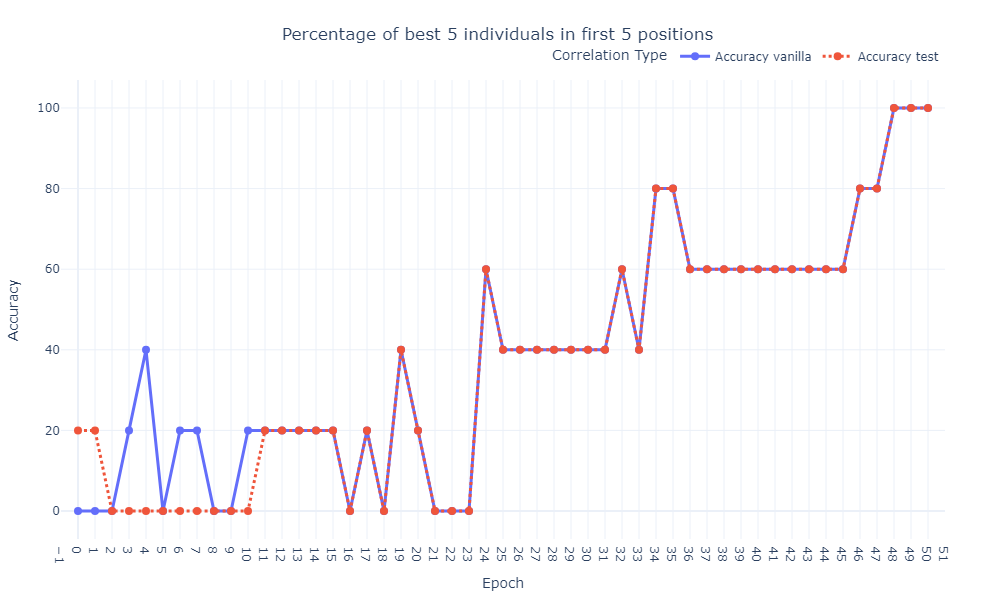

In [720]:
# Melt dataframe for Plotly
df_melted = df_accs.melt(id_vars='Epoch', value_vars=['Accuracy vanilla', "Accuracy test"], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Vanilla and KD Ranking Correlation for the First 20 Epochs with 120 Models',
              labels={"Value": "Accuracy"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Percentage of best 5 individuals in first 5 positions', 'x':0.5, 'xanchor': 'center'},
    #yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [721]:
dataset

'Mateo'

In [722]:
file_name="top_models_accuracy"
#os.makedirs(f"thesis_plots/{dataset}",  exist_ok=True)
os.makedirs(f"thesis_plots/{dataset}/{test_name}",  exist_ok=True)
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.png", format="png")

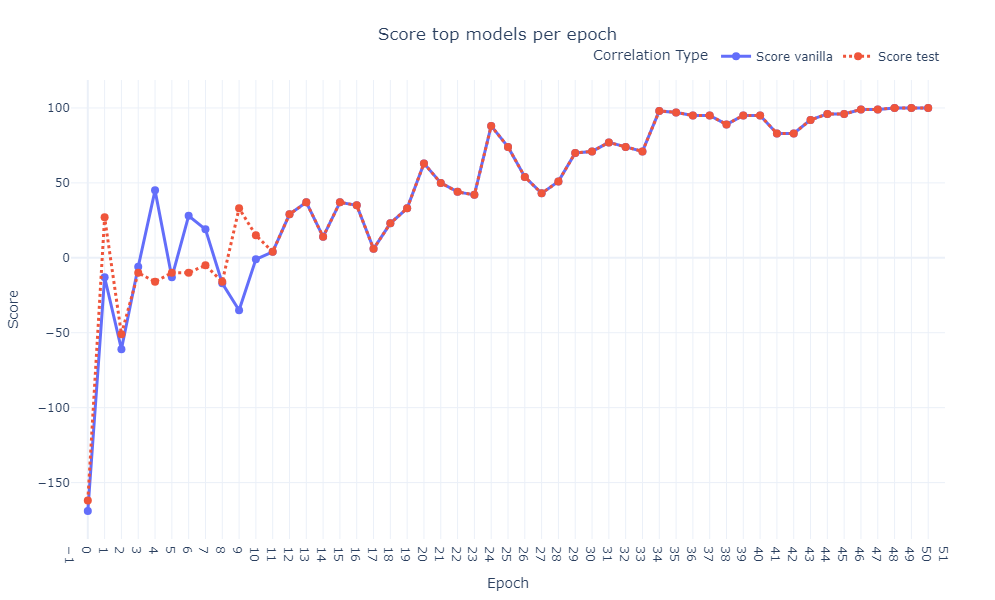

In [723]:
# Melt dataframe for Plotly
df_melted = df_top_scores.melt(id_vars='Epoch', value_vars=['Score vanilla', "Score test"], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Score top models per epoch',
              labels={"Value": "Score"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Score top models per epoch', 'x':0.5, 'xanchor': 'center'},
    #yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [724]:
file_name="scores_best_models_epoch"
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.png", format="png")

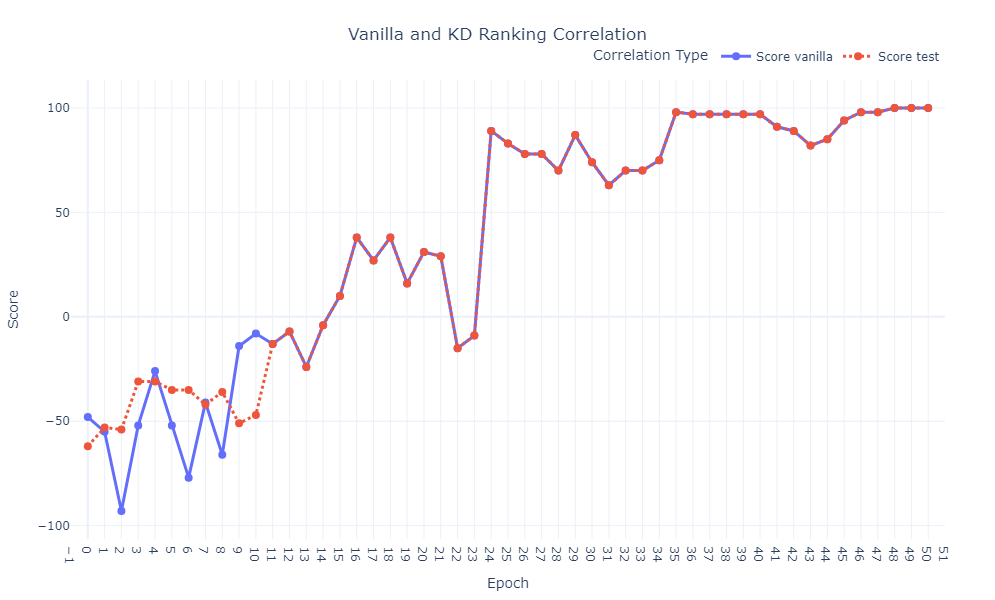

In [725]:
# Melt dataframe for Plotly
df_melted = df_scores.melt(id_vars='Epoch', value_vars=['Score vanilla', "Score test"], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Score top models',
              labels={"Value": "Score"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Vanilla and KD Ranking Correlation', 'x':0.5, 'xanchor': 'center'},
    #yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [726]:
file_name="scores_top_models"
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.png", format="png")

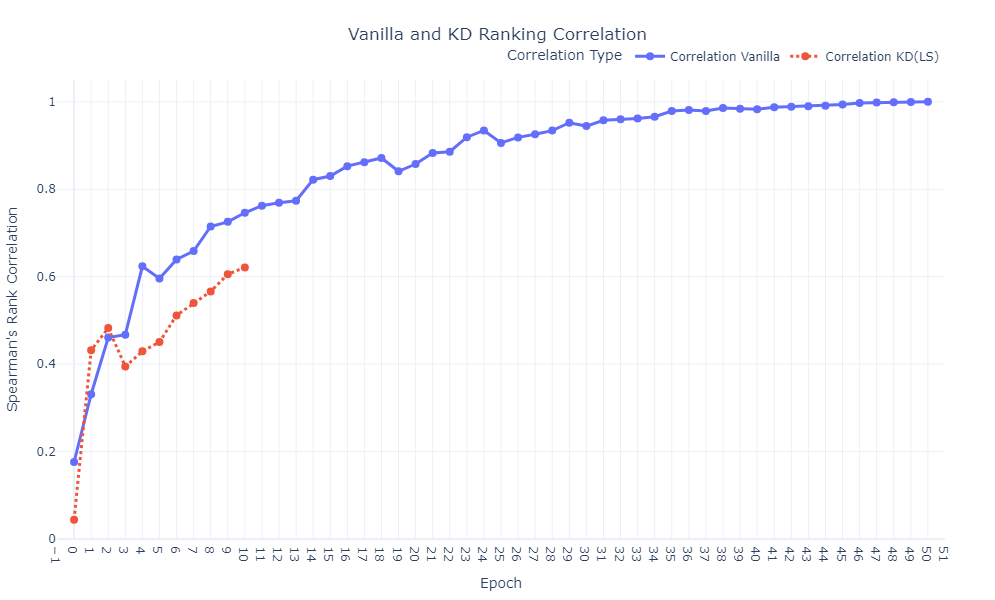

In [727]:
# Parameters
test_column = 'Correlation KD(LS)'
#n_epochs = 20

# Create dataframes
df = pd.DataFrame(list(corr_epochs["correlation_vanilla"].items()), columns=['Epoch', 'Correlation Vanilla'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_kd"].items()), columns=['Epoch', test_column])

# Merge dataframes
df = pd.merge(df, df_slope, on="Epoch")

# Introduce NaNs for data after n_epochs+1
df.loc[n_epochs+1:, test_column] = np.nan

# Melt dataframe for Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation Vanilla', test_column], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Vanilla and KD Ranking Correlation for the First 20 Epochs with 120 Models',
              labels={"Value": "Spearman's Rank Correlation"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Vanilla and KD Ranking Correlation', 'x':0.5, 'xanchor': 'center'},
    yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [728]:
file_name="ranking_correlation"
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.png", format="png")

In [729]:
#fig.write_image(f"thesis_plots/Adaline_kd_correlation.png", format="png")
#fig.write_image(f"thesis_plots/Adaline_kd_correlation.svg", format="svg")

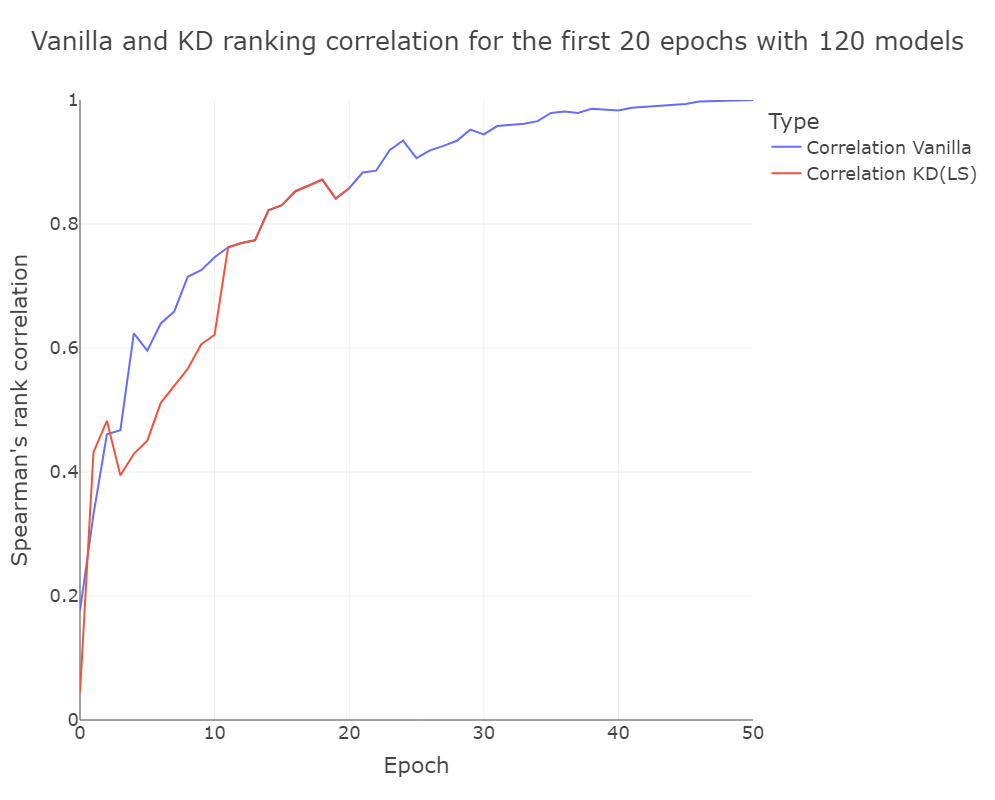

In [730]:
test_column= 'Correlation KD(LS)'
n_epochs=20
df = pd.DataFrame(list(corr_epochs["correlation_vanilla"].items()), columns=['Epoch', 'Correlation Vanilla'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_kd"].items()), columns=['Epoch', test_column])

df=pd.merge(df, df_slope, on="Epoch")
df.loc[n_epochs+1:, test_column] = np.nan
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation Vanilla', test_column], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Vanilla and KD ranking correlation for the first 20 epochs with 120 models')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation",
                 yaxis=dict(range=[0.0, df_melted['Value'].max()]))

fig

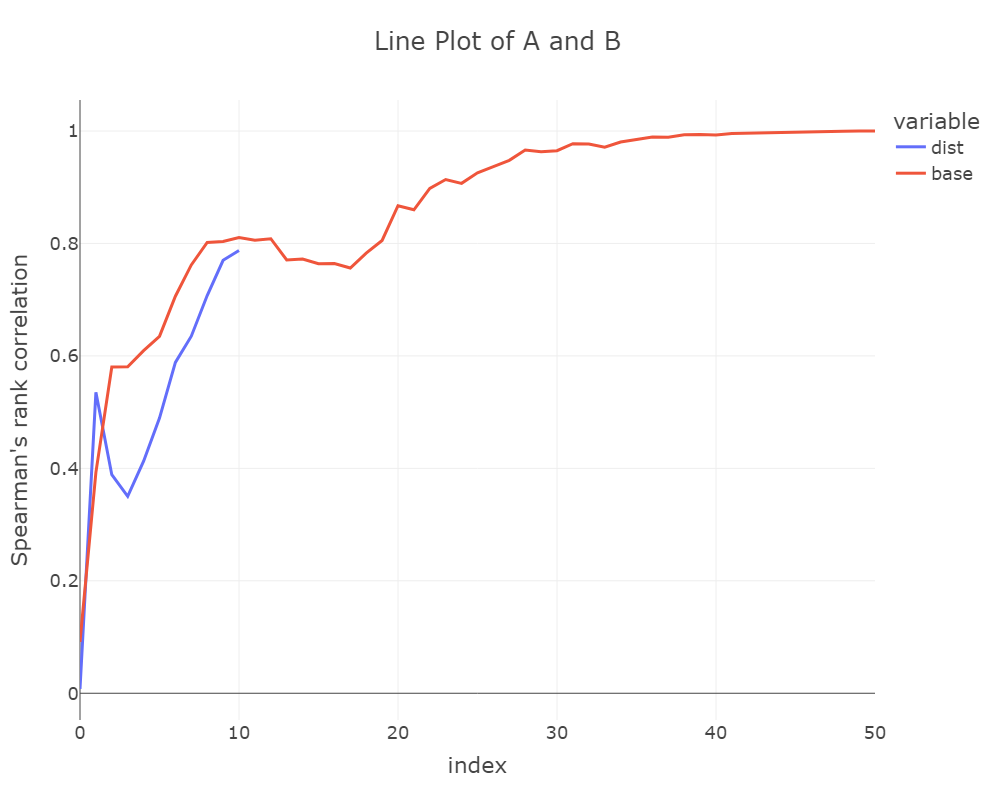

In [731]:
import plotly.express as px

# Create a line plot with two lines (one for each column)
fig = px.line(corr_df.reset_index(drop=True), y=['dist', 'base'], title="Line Plot of A and B")
fig.update_layout(width=800, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
# Show the plot
fig.show()